#### IMPORT LIBRARIES

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
!pip install xgboost
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [2]:
data=pd.read_csv(R"HepatitisCdata.csv")
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [3]:
data=pd.read_csv(R"HepatitisCdata.csv",header=None,names=["Unnamed","Category","Age","Sex","Albumin Blood Test","Alkaline Phosphatase Test","Alanine Transaminase Test","Aspartate Transaminase Test","Bilirubin Blood Test","Cholinesterase","Cholesterol","Creatinine Blood Test","Gamma-Glutamyl Transpeptidase Test","Protein Blood Test"])
data

,Unnamed,Category,Age,Sex,Albumin Blood Test,Alkaline Phosphatase Test,Alanine Transaminase Test,Aspartate Transaminase Test,Bilirubin Blood Test,Cholinesterase,Cholesterol,Creatinine Blood Test,Gamma-Glutamyl Transpeptidase Test,Protein Blood Test
0,NaN,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,1.0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106,12.1,69
2,2.0,0=Blood Donor,32,m,38.5,70.3,18,24.7,3.9,11.17,4.8,74,15.6,76.5
3,3.0,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.2,86,33.2,79.3
4,4.0,0=Blood Donor,32,m,43.2,52,30.6,22.6,18.9,7.33,4.74,80,33.8,75.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,611.0,3=Cirrhosis,62,f,32,416.6,5.9,110.3,50,5.57,6.3,55.7,650.9,68.5
612,612.0,3=Cirrhosis,64,f,24,102.8,2.9,44.4,20,1.54,3.02,63,35.9,71.3
613,613.0,3=Cirrhosis,64,f,29,87.3,3.5,99,48,1.66,3.63,66.7,64.2,82
614,614.0,3=Cirrhosis,46,f,33,NaN,39,62,20,3.56,4.2,52,50,71


In [31]:
data=data.drop(0)
data

,Unnamed,Category,Age,Sex,Albumin Blood Test,Alkaline Phosphatase Test,Alanine Transaminase Test,Aspartate Transaminase Test,Bilirubin Blood Test,Cholinesterase,Cholesterol,Creatinine Blood Test,Gamma-Glutamyl Transpeptidase Test,Protein Blood Test
1,1.0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106,12.1,69
2,2.0,0=Blood Donor,32,m,38.5,70.3,18,24.7,3.9,11.17,4.8,74,15.6,76.5
3,3.0,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.2,86,33.2,79.3
4,4.0,0=Blood Donor,32,m,43.2,52,30.6,22.6,18.9,7.33,4.74,80,33.8,75.7
5,5.0,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,611.0,3=Cirrhosis,62,f,32,416.6,5.9,110.3,50,5.57,6.3,55.7,650.9,68.5
612,612.0,3=Cirrhosis,64,f,24,102.8,2.9,44.4,20,1.54,3.02,63,35.9,71.3
613,613.0,3=Cirrhosis,64,f,29,87.3,3.5,99,48,1.66,3.63,66.7,64.2,82
614,614.0,3=Cirrhosis,46,f,33,NaN,39,62,20,3.56,4.2,52,50,71


In [5]:
data["Sex"].unique()

array(['Sex', 'm', 'f'], dtype=object)

#### EXPLORE DATASET

In [32]:
data.columns

Index(['Unnamed', 'Category', 'Age', 'Sex', 'Albumin Blood Test',
       'Alkaline Phosphatase Test', 'Alanine Transaminase Test',
       'Aspartate Transaminase Test', 'Bilirubin Blood Test', 'Cholinesterase',
       'Cholesterol', 'Creatinine Blood Test',
       'Gamma-Glutamyl Transpeptidase Test', 'Protein Blood Test'],
      dtype='object')

In [33]:
data.shape

(615, 14)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 1 to 615
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed                             615 non-null    float64
 1   Category                            615 non-null    object 
 2   Age                                 615 non-null    object 
 3   Sex                                 615 non-null    object 
 4   Albumin Blood Test                  614 non-null    object 
 5   Alkaline Phosphatase Test           597 non-null    object 
 6   Alanine Transaminase Test           614 non-null    object 
 7   Aspartate Transaminase Test         615 non-null    object 
 8   Bilirubin Blood Test                615 non-null    object 
 9   Cholinesterase                      615 non-null    object 
 10  Cholesterol                         605 non-null    object 
 11  Creatinine Blood Test               615 non-n

In [35]:
#numerical features of a data
data.describe()

,Unnamed
count,615.000000
mean,308.000000
std,177.679487
min,1.000000
25%,154.500000
50%,308.000000
75%,461.500000
max,615.000000


In [36]:
data=data.drop("Unnamed",axis=1)
data

,Category,Age,Sex,Albumin Blood Test,Alkaline Phosphatase Test,Alanine Transaminase Test,Aspartate Transaminase Test,Bilirubin Blood Test,Cholinesterase,Cholesterol,Creatinine Blood Test,Gamma-Glutamyl Transpeptidase Test,Protein Blood Test
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106,12.1,69
2,0=Blood Donor,32,m,38.5,70.3,18,24.7,3.9,11.17,4.8,74,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.2,86,33.2,79.3
4,0=Blood Donor,32,m,43.2,52,30.6,22.6,18.9,7.33,4.74,80,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,3=Cirrhosis,62,f,32,416.6,5.9,110.3,50,5.57,6.3,55.7,650.9,68.5
612,3=Cirrhosis,64,f,24,102.8,2.9,44.4,20,1.54,3.02,63,35.9,71.3
613,3=Cirrhosis,64,f,29,87.3,3.5,99,48,1.66,3.63,66.7,64.2,82
614,3=Cirrhosis,46,f,33,NaN,39,62,20,3.56,4.2,52,50,71


In [37]:
data.isnull().sum()

Category                               0
Age                                    0
Sex                                    0
Albumin Blood Test                     1
Alkaline Phosphatase Test             18
Alanine Transaminase Test              1
Aspartate Transaminase Test            0
Bilirubin Blood Test                   0
Cholinesterase                         0
Cholesterol                           10
Creatinine Blood Test                  0
Gamma-Glutamyl Transpeptidase Test     0
Protein Blood Test                     1
dtype: int64

In [38]:
data.dtypes

Category                              object
Age                                   object
Sex                                   object
Albumin Blood Test                    object
Alkaline Phosphatase Test             object
Alanine Transaminase Test             object
Aspartate Transaminase Test           object
Bilirubin Blood Test                  object
Cholinesterase                        object
Cholesterol                           object
Creatinine Blood Test                 object
Gamma-Glutamyl Transpeptidase Test    object
Protein Blood Test                    object
dtype: object

#### PREPROCESSING

In [39]:
Category_columns={"Age","Sex","Albumin Blood Test","Alkaline Phosphatase Test","Alanine Transaminase Test","Aspartate Transaminase Test","Bilirubin Blood Test","Cholinesterase","Cholesterol","Creatinine Blood Test","Gamma-Glutamyl Transpeptidase Test","Protein Blood Test"}

Label_Encoder=LabelEncoder()

for col in Category_columns:
  data[col]=Label_Encoder.fit_transform(data[col])

In [40]:
ALB_mean=data["Albumin Blood Test"].mean()
ALP_mean=data["Alkaline Phosphatase Test"].mean()
ALT_mean=data["Alanine Transaminase Test"].mean()
CHOL_mean=data["Cholesterol"].mean()
PROT_mean=data["Protein Blood Test"].mean()

In [41]:
data["Albumin Blood Test"]=data["Albumin Blood Test"].fillna(ALB_mean)
data["Alkaline Phosphatase Test"]=data["Alkaline Phosphatase Test"].fillna(ALP_mean)
data["Alanine Transaminase Test"]=data["Alanine Transaminase Test"].fillna(ALT_mean)
data["Cholesterol"]=data["Cholesterol"].fillna(CHOL_mean)
data["Protein Blood Test"]=data["Protein Blood Test"].fillna(PROT_mean)

In [42]:
data.isnull().sum()

Category                              0
Age                                   0
Sex                                   0
Albumin Blood Test                    0
Alkaline Phosphatase Test             0
Alanine Transaminase Test             0
Aspartate Transaminase Test           0
Bilirubin Blood Test                  0
Cholinesterase                        0
Cholesterol                           0
Creatinine Blood Test                 0
Gamma-Glutamyl Transpeptidase Test    0
Protein Blood Test                    0
dtype: int64

#### MATPLOTLIB

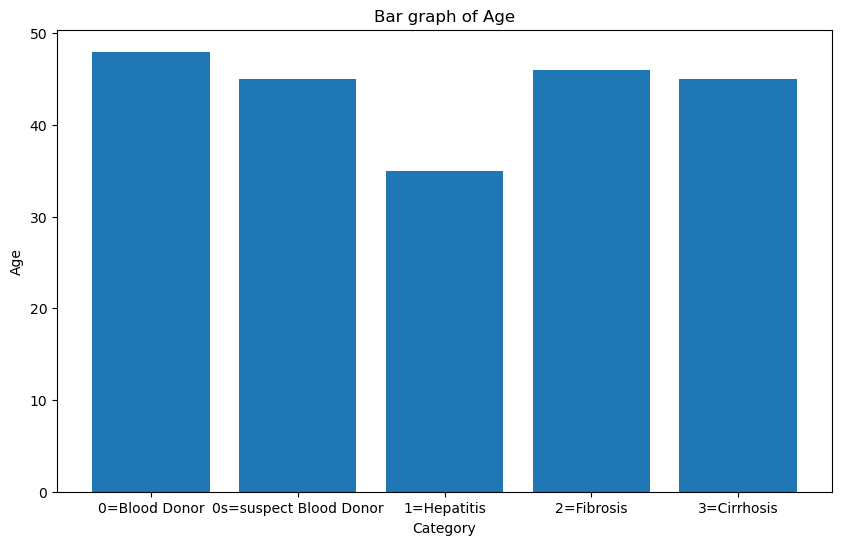

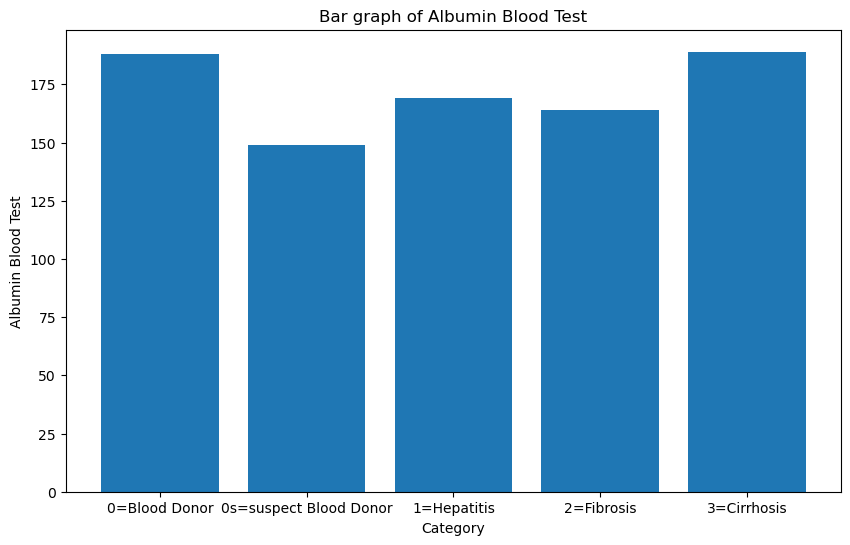

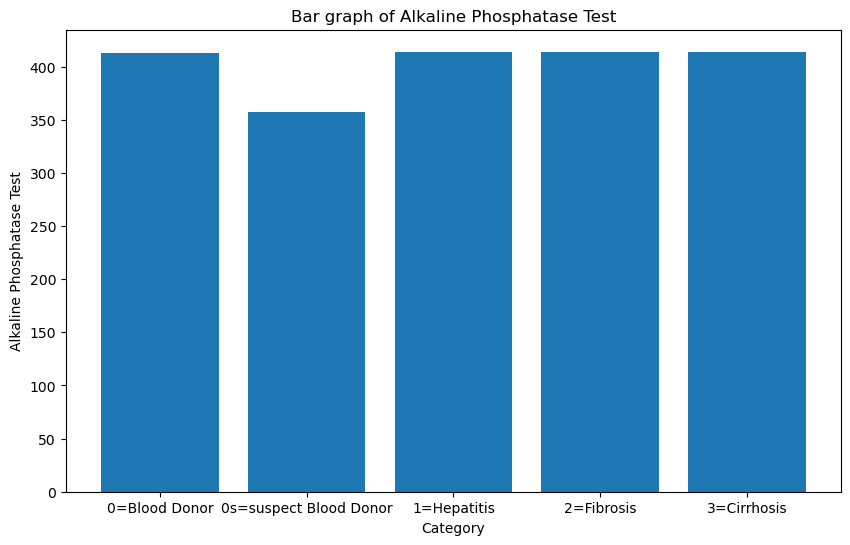

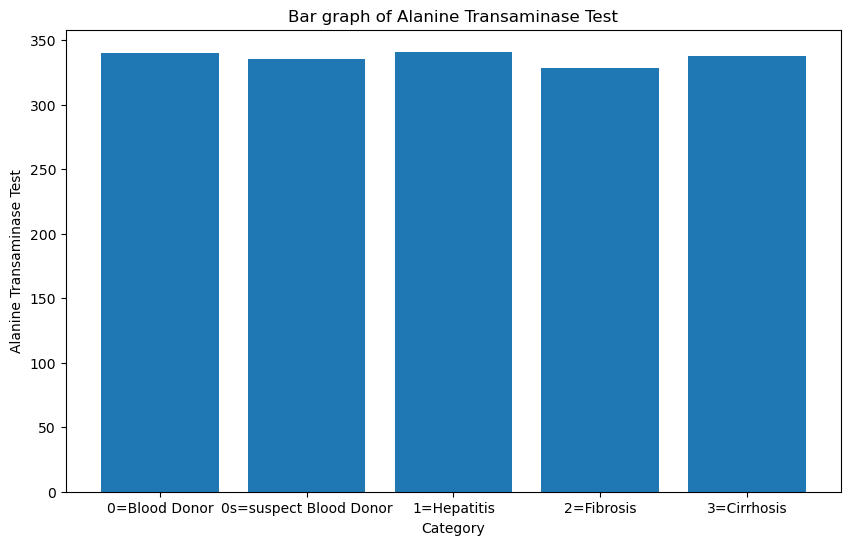

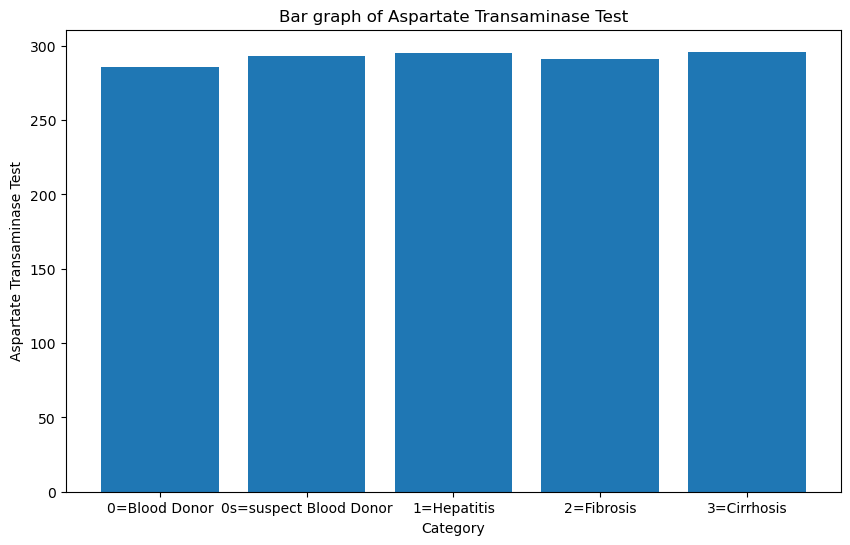

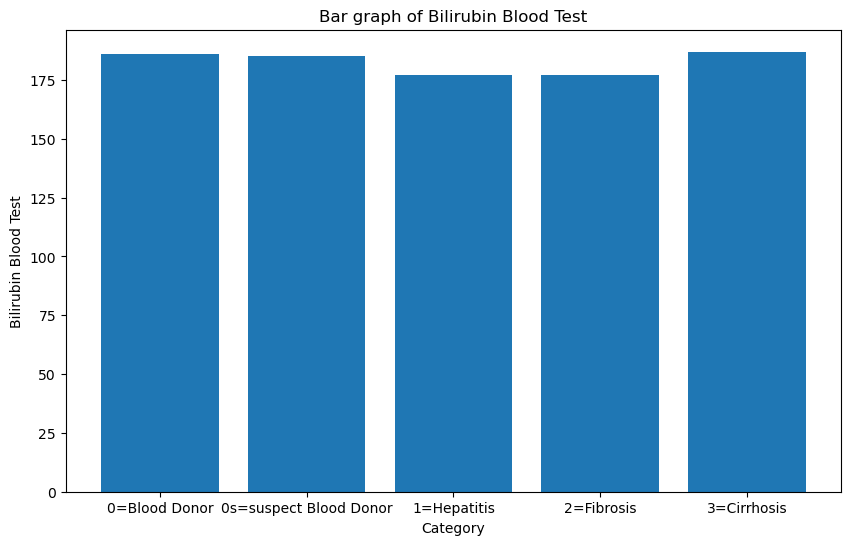

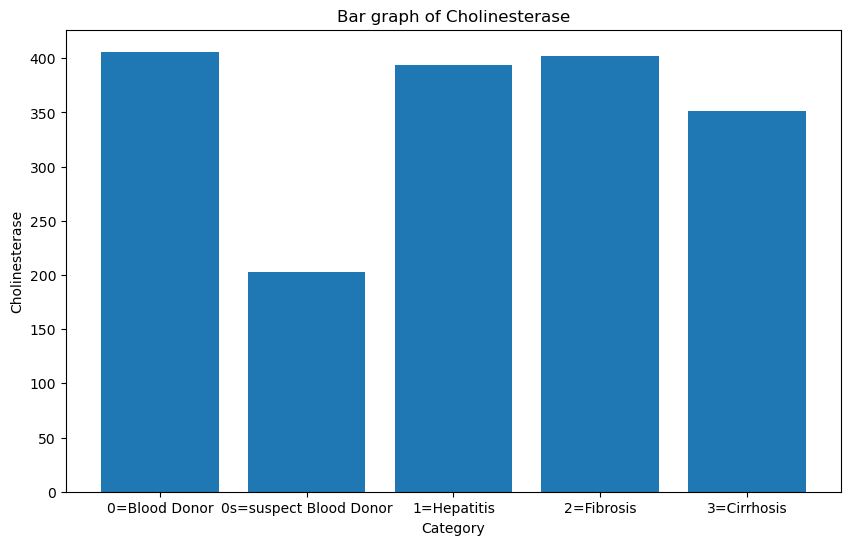

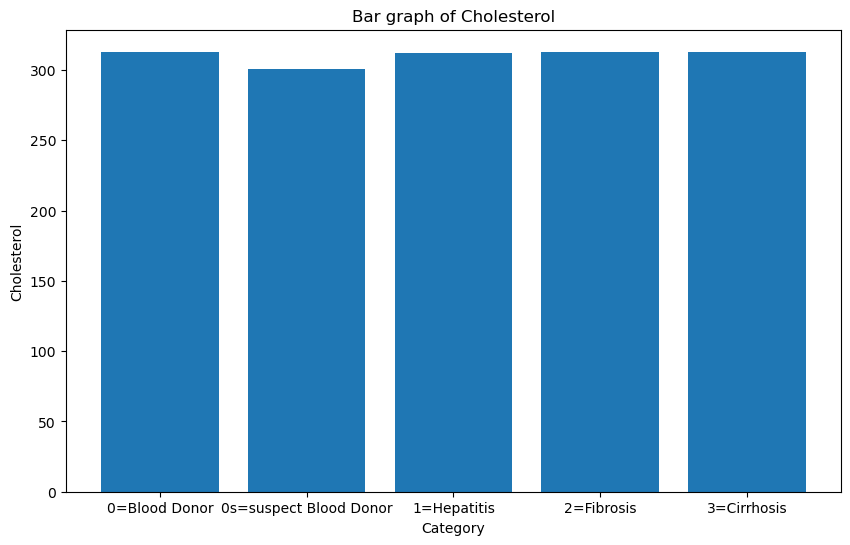

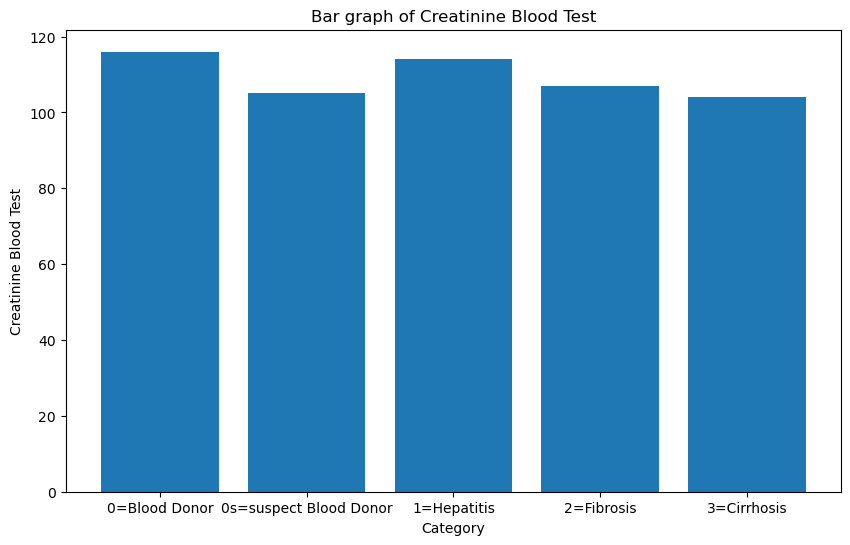

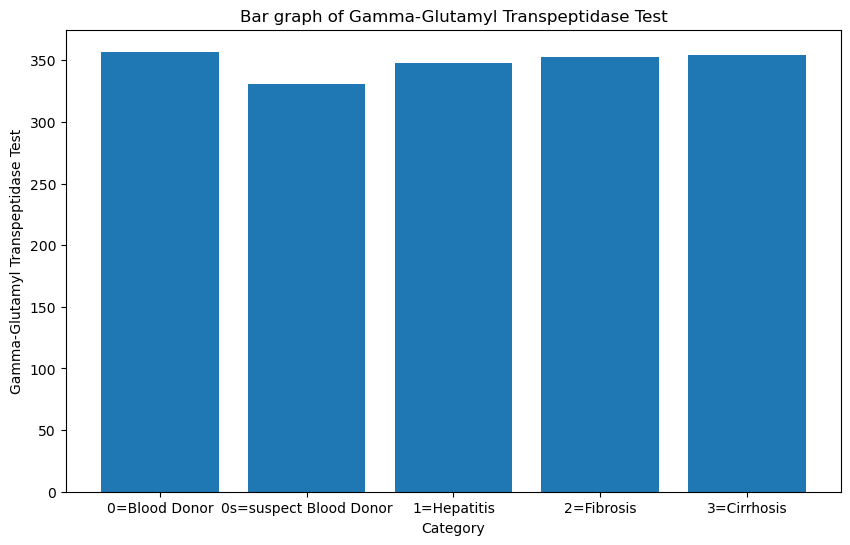

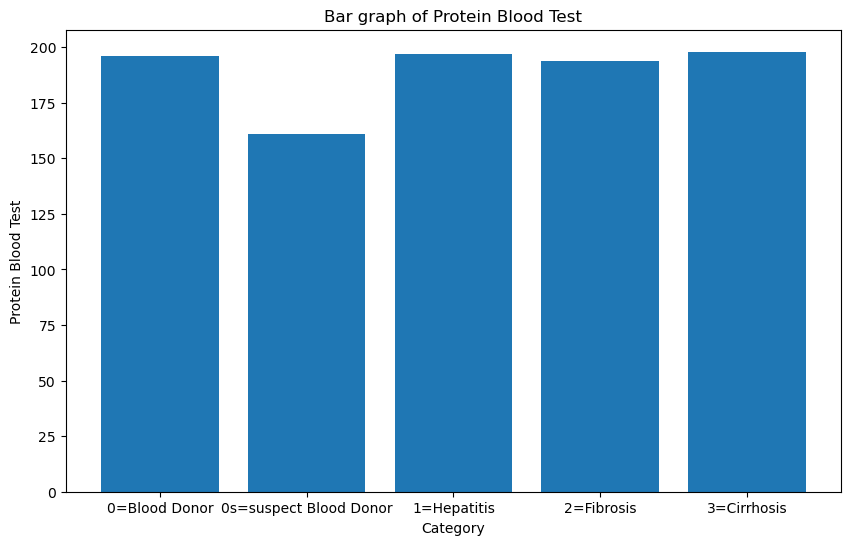

In [87]:
numerical_features=["Age","Albumin Blood Test","Alkaline Phosphatase Test","Alanine Transaminase Test","Aspartate Transaminase Test","Bilirubin Blood Test","Cholinesterase","Cholesterol","Creatinine Blood Test","Gamma-Glutamyl Transpeptidase Test","Protein Blood Test"]
for feature in numerical_features:
    plt.figure(figsize=(10,6))
    plt.bar(data["Category"],data[feature])
    plt.xlabel("Category")
    plt.ylabel(feature)
    plt.title(f"Bar graph of {feature}")
    plt.show()

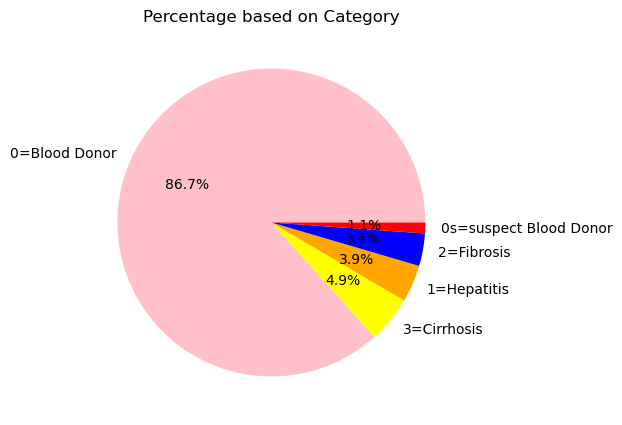

In [47]:
#count
Category_counts=data["Category"].value_counts()

plt.figure(figsize=(5,5))
colors=["pink","yellow","orange","blue","red"]

plt.pie(Category_counts,labels=Category_counts.index,autopct="%1.1f%%",colors=colors)
plt.title("Percentage based on Category")
plt.show()

#### SPLITING DATA

In [48]:
x=data.drop("Category",axis=1)
y=data["Category"]

In [49]:
x

,Age,Sex,Albumin Blood Test,Alkaline Phosphatase Test,Alanine Transaminase Test,Aspartate Transaminase Test,Bilirubin Blood Test,Cholinesterase,Cholesterol,Creatinine Blood Test,Gamma-Glutamyl Transpeptidase Test,Protein Blood Test
1,6,1,64,142,319,93,162,209,12,5,26,69
2,6,1,64,262,76,118,110,64,109,76,61,144
3,6,1,146,297,226,265,147,336,144,100,206,170
4,6,1,111,138,189,98,65,237,106,89,209,136
5,6,1,71,294,204,119,183,356,69,80,187,66
...,...,...,...,...,...,...,...,...,...,...,...,...
611,36,0,20,81,288,5,143,144,233,39,296,64
612,38,0,7,4,98,252,79,2,6,55,221,92
613,38,0,15,376,182,296,132,4,25,61,293,185
614,20,0,23,414,238,275,79,106,58,34,267,89


In [50]:
y

1      0=Blood Donor
2      0=Blood Donor
3      0=Blood Donor
4      0=Blood Donor
5      0=Blood Donor
           ...      
611      3=Cirrhosis
612      3=Cirrhosis
613      3=Cirrhosis
614      3=Cirrhosis
615      3=Cirrhosis
Name: Category, Length: 615, dtype: object

#### BUILDING MODEL

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
model_params={"svm":{"model":SVC(gamma="auto"),"params":{"C":[1,5,10],"kernel":["rbf","Linear"]}},
             "RandomForest":{"model":RandomForestClassifier(),"params":{"n_estimators":[1,5,10]}},
             "LogisticRegression":{"model":LogisticRegression(),"params":{"C":[1,5,10]}}}

In [61]:
score=[]
models=["svm","RandomForest","LogisticRegression"]

In [62]:
for model_name in models:
    mp = model_params[model_name]
    gds = GridSearchCV(mp["model"],mp["params"],cv=5,return_train_score=True)
    gds.fit(x_train,y_train)
    score.append({"model":model_name,"best_score":gds.best_score_,"best_params":gds.best_params_})

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._valida

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
pd.DataFrame(score)

,model,best_score,best_params
0,svm,0.888209,"{'C': 1, 'kernel': 'rbf'}"
1,RandomForest,0.908534,{'n_estimators': 10}
2,LogisticRegression,0.902453,{'C': 1}


In [70]:
model1=RandomForestClassifier()
model1.fit(x_train,y_train)

RandomForestClassifier()

In [71]:
model1.score(x_train,y_train)

1.0

In [72]:
model1.score(x_test,y_test)

0.8455284552845529

#### USER INPUT PREDICTION

In [ ]:
user_input={
"Age":int(input("Enter the age:")),
"Sex":int(input("Enter the gender:0.Female 1.Male. ")),
"Albumin Blood Test":float(input("Albumin Blood Test (ALB) g/L: ")),
"Alkaline Phosphatase Test":float(input("Alkaline Phosphatase Test (ALP) IU/L: ")),
"Alanine Transaminase Test":float(input("Alanine Transaminase Test (ALT) U/L: ")),
"Aspartate Transaminase Test":float(input("Aspartate Transaminase Test (AST) U/L: ")),
"Bilirubin Blood Test":float(input("Bilirubin Blood Test (BIL) µmol/L': ")),
"Cholinesterase":float(input("Cholinesterase (CHE) kU/L: ")),
"Cholesterol":float(input("Cholesterol (CHOL) mmol/L: ")),
"Creatinine Blood Test":float(input("Creatinine Blood Test (CREA) µmol/L: ")),
"Gamma-Glutamyl Transpeptidase Test":float(input("Gamma-Glutamyl Transpeptidase Test (GGT) U/L: ")),
"Protein Blood Test":float(input("Protein Blood Test (PROT) g/L: "))
}

In [74]:
user=pd.DataFrame([user_input])
user

,Age,Sex,Albumin Blood Test,Alkaline Phosphatase Test,Alanine Transaminase Test,Aspartate Transaminase Test,Bilirubin Blood Test,Cholinesterase,Cholesterol,Creatinine Blood Test,Gamma-Glutamyl Transpeptidase Test,Protein Blood Test
0,42,54,56.0,45.0,74.0,85.0,65.0,65.0,55.0,45.0,55.0,42.0


In [75]:
model1.predict(user)

array(['0=Blood Donor'], dtype=object)

#### PREDICTION TABLE

In [76]:
y_pred=model1.predict(x_test)
y_pred

array(['0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '3=Cirrhosis', '0=Blood Donor',
       '1=Hepatitis', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '3=Cirrhosis', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '2=Fibrosis',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '3=Cirrhos

In [77]:
prediction_table=pd.DataFrame({"Actual y value":y_test,"Predicted y value":y_pred})
prediction_table

,Actual y value,Predicted y value
249,0=Blood Donor,0=Blood Donor
366,0=Blood Donor,0=Blood Donor
433,0=Blood Donor,0=Blood Donor
611,3=Cirrhosis,0=Blood Donor
133,0=Blood Donor,0=Blood Donor
...,...,...
282,0=Blood Donor,0=Blood Donor
292,0=Blood Donor,0=Blood Donor
251,0=Blood Donor,0=Blood Donor
12,0=Blood Donor,0=Blood Donor


#### PERFORMANCE OF MODEL

In [79]:
accuracy_score(y_pred,y_test)

0.8455284552845529

In [80]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[96,  2,  8,  3,  4],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  1],
       [ 0,  0,  0,  3,  0],
       [ 0,  1,  0,  0,  4]], dtype=int64)

In [81]:
print(classification_report(y_pred,y_test))

                        precision    recall  f1-score   support

         0=Blood Donor       1.00      0.85      0.92       113
0s=suspect Blood Donor       0.00      0.00      0.00         0
           1=Hepatitis       0.11      0.50      0.18         2
            2=Fibrosis       0.50      1.00      0.67         3
           3=Cirrhosis       0.44      0.80      0.57         5

              accuracy                           0.85       123
             macro avg       0.41      0.63      0.47       123
          weighted avg       0.95      0.85      0.89       123



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### HEATMAP

<Axes: >

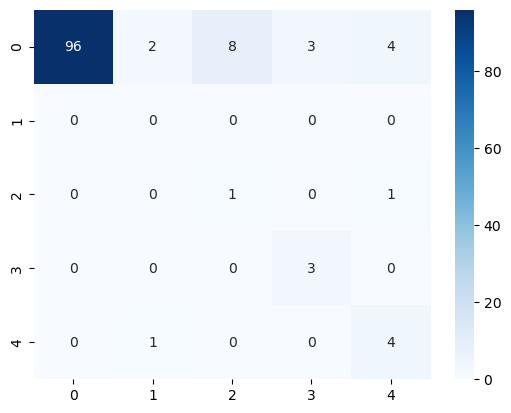

In [82]:
sns.heatmap(cm,annot=True,cmap="Blues")